## Importing libraries and getting data into jupyter

In [4]:
#importting libraries
import requests
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pls

In [2]:
#TSV url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
# request to tsv url and store data into file
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file :
    file.write(response.content)

In [4]:
#checking file list
os.listdir()

['wrangle_act.ipynb',
 '.ipynb_checkpoints',
 'twitter-archive-enhanced.csv',
 'image-predictions.tsv']

In [5]:
# make list of tweets id
twitter_archive_enh = pd.read_csv('twitter-archive-enhanced.csv')
tweet_ids = list(twitter_archive_enh.tweet_id)
len(tweet_ids)

2356

In [5]:
import tweepy
from timeit import default_timer as timer
import json

In [ ]:
consumer_key = 'bvzJAYUMWhqQTmZid8yqnVXYA'
consumer_secret = 'jTrHT7bDVhAShmaW1Z3BRXHrVj3fixyYG4FG0EpgUirWBqKPCk'
access_token = '372271092-vHKFE2yNEf8JM3nj8RftPq3kREFzckuOXtq74gIF'
access_secret = 'yZpupERQaYD2f6If0b1obi3l8hf03eK3VZaBS3uMeygii'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
#checking file list
os.listdir()

['wrangle_act.ipynb',
 '.ipynb_checkpoints',
 'twitter-archive-enhanced.csv',
 'image-predictions.tsv']

## See overview of all data

In [6]:
# importing data to pandas dataframe
twitter_archive_enh = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
#open json data
json_data = [json.loads(line) for line in open('tweet_json.txt', 'r')]

In [8]:
#get list of keys in dictionary
list(json_data[0].keys())

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang']

In [9]:
json_data[0]['full_text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [10]:
# take several parameter from dictionary data into list
json_conv = []

for datum in json_data:
    json_conv.append([datum['id'],datum['full_text'], datum['in_reply_to_status_id'], datum['in_reply_to_user_id'], datum['retweet_count'], datum['favorite_count']])

In [11]:
#change list into df
json_df = pd.DataFrame(json_conv, columns=['tweet_id', 'full_text', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweet_count','favorite_count'])

### twitter_archive_enhanced

In [12]:
# see head and tail of twitter archive enhanced
twitter_archive_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- find wrong column name, floof instead of floofer
- timestamp has date and time in one column

In [13]:
twitter_archive_enh.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

timestamp and retweeted_status_timestamp must be in date type
in_reply_to_status_id and in_reply_to_user_id must be in int type

In [14]:
twitter_archive_enh[twitter_archive_enh['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


several Retweet data in this dataframe

In [15]:
twitter_archive_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Strange value in rating_numerator and rating_denominator since number of max is very far from mean data and 75% data

In [16]:
# adding new column will help the investigation
# calculate normalize rating by dividing rating_numerator and rating/denominator
twitter_archive_enh['normalize_rating'] = twitter_archive_enh['rating_numerator']/twitter_archive_enh['rating_denominator']

In [20]:
twitter_archive_enh[['rating_numerator', 'rating_denominator', 'normalize_rating']].describe()

,rating_numerator,rating_denominator,normalize_rating
count,2356.000000,2356.000000,2356.000000
mean,13.126486,10.455433,inf
std,45.876648,6.745237,NaN
min,0.000000,0.000000,0.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.100000
75%,12.000000,10.000000,1.200000
max,1776.000000,170.000000,inf


there are inf value in normalize rating, which is really strange value since median is 1.10. It is probably occure because of 0 value in rating denominator. Deep exploration needed in this value.

In [22]:
twitter_archive_enh.normalize_rating.sort_values(ascending=False)

313            inf
979     177.600000
189      66.600000
2074     42.000000
188      42.000000
290      18.200000
340       7.500000
695       7.500000
516       3.428571
763       2.700000
1712      2.600000
55        1.700000
285       1.500000
291       1.500000
64        1.400000
418       1.400000
924       1.400000
68        1.400000
186       1.400000
117       1.400000
123       1.400000
404       1.400000
395       1.400000
187       1.400000
490       1.400000
76        1.400000
56        1.400000
141       1.400000
866       1.400000
426       1.400000
           ...    
2202      0.300000
2305      0.300000
1601      0.300000
1189      0.300000
1249      0.300000
1692      0.300000
2239      0.300000
2136      0.300000
1314      0.300000
2310      0.200000
1761      0.200000
2349      0.200000
1764      0.200000
1598      0.200000
1165      0.200000
2246      0.200000
1920      0.200000
2326      0.200000
2079      0.200000
2237      0.200000
2091      0.100000
2038      0.

In [23]:
# see data when in reply to status is not null
twitter_archive_enh[twitter_archive_enh.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [25]:
twitter_archive_enh.query('normalize_rating==inf')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,normalize_rating
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,inf


rating_numerator is very big but rating_denominator is 0. let's check the value in text.

In [29]:
# get index of infinite number
twitter_archive_enh.query('normalize_rating==inf').index

Int64Index([313], dtype='int64')

In [27]:
list(twitter_archive_enh.query('normalize_rating==inf').text)

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]

in fact, value stored in rating_numerator and rating_denominator is wrong. It it 13/10 instead of 960/0. So rating_numerator and rating denominator in row 313 need to be fixed into 13/10

In [ ]:
twitter_archive_enh['text'][263]

In [26]:
twitter_archive_enh['text'][571]

"This is Wallace. He'll be your chau-fur this evening. 12/10 eyes on the road Wallace https://t.co/p1RD39XjUe"

text column including content and link

### image_prediction

In [30]:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg           

several jgp_url has duplication, it needs further inspection to make sure there are a duplication of image or not

In [34]:
image_predictions[image_predictions['jpg_url']=='https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1441,775085132600442880,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True


there are duplication data with different tweet_id

In [35]:
dup = image_predictions[image_predictions.duplicated(subset=['jpg_url', 'img_num'], keep =False)]
dup.sort_values('jpg_url')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


dog prediction will be more clear without '_' and '-' separator and all character must re-cast into lowercase

### Json_dataframe

In [36]:
json_df

,tweet_id,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,7740,36366
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,5730,31326
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,3791,23598
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,7902,39669
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,8524,37867
5,891087950875897856,Here we have a majestic great white breaching ...,NaN,NaN,2852,19069
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,1859,11109
7,890729181411237888,When you watch your owner call another dog a g...,NaN,NaN,17268,61269
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,NaN,NaN,3934,26251
9,890240255349198849,This is Cassie. She is a college pup. Studying...,NaN,NaN,6730,29986


In [37]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id                 2331 non-null int64
full_text                2331 non-null object
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
retweet_count            2331 non-null int64
favorite_count           2331 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 109.3+ KB


In [38]:
json_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,2.331000e+03,7.700000e+01,7.700000e+01,2331.00000,2331.000000
mean,7.419079e+17,7.440692e+17,2.040329e+16,2716.42042,7594.847276
std,6.823170e+16,7.524295e+16,1.260797e+17,4594.59356,11784.709902
min,6.660209e+17,6.658147e+17,1.185634e+07,1.00000,0.000000
25%,6.782670e+17,6.757073e+17,3.589728e+08,548.50000,1324.500000
50%,7.182469e+17,7.032559e+17,4.196984e+09,1275.00000,3307.000000
75%,7.986692e+17,8.233264e+17,4.196984e+09,3156.00000,9306.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,78210.00000,156972.000000


max value in retweet_count and favourite_count is unusual, deeper inspection is needed

In [39]:
# adding favorite_retweet_ratio that calculated from favorite_count/retweet_count
json_df['favorite_retweet_ration'] =  json_df['favorite_count']/json_df['retweet_count']

In [40]:
json_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,favorite_retweet_ration
count,2.331000e+03,7.700000e+01,7.700000e+01,2331.00000,2331.000000,2331.000000
mean,7.419079e+17,7.440692e+17,2.040329e+16,2716.42042,7594.847276,3.563748
std,6.823170e+16,7.524295e+16,1.260797e+17,4594.59356,11784.709902,4.175131
min,6.660209e+17,6.658147e+17,1.185634e+07,1.00000,0.000000,0.000000
25%,6.782670e+17,6.757073e+17,3.589728e+08,548.50000,1324.500000,2.471211
50%,7.182469e+17,7.032559e+17,4.196984e+09,1275.00000,3307.000000,3.226345
75%,7.986692e+17,8.233264e+17,4.196984e+09,3156.00000,9306.000000,4.072335
max,8.924206e+17,8.862664e+17,8.405479e+17,78210.00000,156972.000000,140.000000


In [41]:
json_df.query('(retweet_count>3156) & (favorite_count<3307)')

,tweet_id,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,favorite_retweet_ration
35,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,NaN,NaN,16975,0,0.0
67,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,NaN,NaN,6243,0,0.0
73,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,NaN,6123,0,0.0
90,874434818259525634,RT @dog_rates: This is Coco. At first I though...,NaN,NaN,13401,0,0.0
105,871166179821445120,RT @dog_rates: This is Dawn. She's just checki...,NaN,NaN,5299,0,0.0
131,866094527597207552,RT @dog_rates: Here's a pupper before and afte...,NaN,NaN,7886,0,0.0
158,860177593139703809,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,NaN,NaN,29468,0,0.0
164,858860390427611136,RT @dog_rates: Meet Winston. He knows he's a l...,NaN,NaN,7765,0,0.0
186,855245323840757760,RT @dog_rates: Meet George. He looks slightly ...,NaN,NaN,5777,0,0.0
213,849668094696017920,RT @dog_rates: This is Gidget. She's a spy pup...,NaN,NaN,4886,0,0.0


It is weird to see favorite_retweet_ratio is 0, in fact that tweet has big retweet count. 
With average favorite_retweet_ratio around 3.22, favorite count should be bigger than retweet count

In [42]:
json_df.query('favorite_retweet_ration>4.07').sort_values('favorite_retweet_ration', ascending=False)

,tweet_id,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,favorite_retweet_ration
279,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking fo...,8.380855e+17,2.894131e+09,1,140,140.000000
262,840698636975636481,@0_kelvin_0 &gt;10/10 is reserved for puppos s...,8.406983e+17,8.405479e+17,2,175,87.500000
109,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,8.707262e+17,1.648776e+07,3,116,38.666667
178,856288084350160898,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,15,504,33.600000
328,832088576586297345,@docmisterio account started on 11/15/15,8.320875e+17,3.058208e+07,2,64,32.000000
63,879674319642796034,@RealKentMurphy 14/10 confirmed,8.795538e+17,3.105441e+09,10,297,29.700000
299,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,8.352460e+17,2.625958e+07,73,2117,29.000000
393,823333489516937216,@HistoryInPics 13/10,8.233264e+17,1.582854e+09,25,710,28.400000
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,8.862664e+17,2.281182e+09,4,113,28.250000
411,821153421864615936,@imgur for a polar bear tho I'd say 13/10 is a...,8.211526e+17,1.132119e+08,10,261,26.100000


In [43]:
cek_rt_json = json_df.full_text.str.extract(r'(RT @.*)')
cek_rt_json[cek_rt_json[0].notnull()]

,0
31,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35,RT @dog_rates: This is Lilly. She just paralle...
67,RT @dog_rates: This is Emmy. She was adopted t...
72,RT @dog_rates: Meet Shadow. In an attempt to r...
73,RT @dog_rates: Meet Terrance. He's being yelle...
77,RT @rachel2195: @dog_rates the boyfriend and h...
90,RT @dog_rates: This is Coco. At first I though...
95,RT @dog_rates: This is Sierra. She's one preci...
105,RT @dog_rates: This is Dawn. She's just checki...
119,RT @dog_rates: Say hello to Cooper. His expres...


found Retweeted tweets in json dataframe

## Assess data note

## Quality

#### twitter atchive enhanced

- timestamp and retweeted status timestamp has type string, which will good in date type

- wrong column name, floofer must be floof

- in_reply_to_status_id and in_reply_to_user_id type is in float, but it must be in int

- Retweet data is in dataframe must be deleted

- rating_numerator and rating_denominator in row 313 value on normalize_rating is 13/10 instead of 960/0

### image prediction

- dog prediction will be more clear by replacing '_' separator into space

- Several data duplication stored with different tweet_id

- name of all dogs predictions are variate with upper and lower case

### Json data

- retweeted tweets is in data

## Tidy

### twitter archive enhanced

- timestamp has date and time in one column

- text column value has two informations, there are tweet content and link

## Cleaning data process in quality

### copy dataframe

In [73]:
twit_arc_copy = twitter_archive_enh.copy()

In [74]:
img_pred_copy = image_predictions.copy()

In [75]:
json_copy = json_df.copy()

### `timestamp and retweet_timestamp has string type, which must be date`

### Define

timestamp and retweet_timestamp column type will change into date type

### Code

In [76]:
#inspect value in timestamp
twit_arc_copy.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [77]:
#change data type in timestamp into datetime64
twit_arc_copy['timestamp'] = twit_arc_copy.timestamp.astype('datetime64')

In [78]:
#change data type in retweet_status_timestamp into datetime64
twit_arc_copy['retweeted_status_timestamp'] = twit_arc_copy.retweeted_status_timestamp.astype('datetime64')

In [79]:
twit_arc_copy[['timestamp', 'retweeted_status_timestamp']]

,timestamp,retweeted_status_timestamp
0,2017-08-01 16:23:56,NaT
1,2017-08-01 00:17:27,NaT
2,2017-07-31 00:18:03,NaT
3,2017-07-30 15:58:51,NaT
4,2017-07-29 16:00:24,NaT
5,2017-07-29 00:08:17,NaT
6,2017-07-28 16:27:12,NaT
7,2017-07-28 00:22:40,NaT
8,2017-07-27 16:25:51,NaT
9,2017-07-26 15:59:51,NaT


### Test

In [80]:
# check data type of changed column 
twit_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
normalize_rating

### `wrong column name, floof insted of floofer`

### Define

rename floofer column into floof

### Code

In [81]:
# Change column named 'floofer' become 'floof'
twit_arc_copy.rename(columns={'floofer':'floof'}, inplace = True)

In [82]:
twit_arc_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


### Test

In [83]:
# listing all column names in twit archive clean
list (twit_arc_copy.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo',
 'normalize_rating']

### `in_reply_to_status_id and in_reply_to_user_id should be in int, present in float`

### Define

Change in_reply_to_status_id type into int, either do in_reply_to_user_id type

### Code

In [84]:
twitter_archive_enh.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,normalize_rating
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,0.5
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,0.6
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,0.9
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,0.7
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,0.8


In [85]:
# change null value into 0
twit_arc_copy.in_reply_to_status_id = twit_arc_copy.in_reply_to_status_id.fillna(0)
twit_arc_copy.in_reply_to_user_id = twit_arc_copy.in_reply_to_user_id.fillna(0)

In [86]:
twit_arc_copy[twit_arc_copy.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating


In [87]:
# change in_reply_to_status_id and in_reply_to_user_id data type to int
twit_arc_copy.in_reply_to_status_id = twit_arc_copy.in_reply_to_status_id.astype(int)
twit_arc_copy.in_reply_to_user_id = twit_arc_copy.in_reply_to_user_id.astype(int)

In [88]:
twit_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
normalize_rating

In [89]:
twit_arc_copy.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating
2351,666049248165822465,0,0,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,0.5
2352,666044226329800704,0,0,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,0.6
2353,666033412701032449,0,0,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,0.9
2354,666029285002620928,0,0,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,0.7
2355,666020888022790149,0,0,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,0.8


### Test

In [90]:
twit_arc_copy['in_reply_to_user_id'].unique()

array([                 0,         2281181600,           47384430,
               3105440746,           16487760,           77596200,
               4196983835,          180670967,          279280991,
                194351775,           13615722,           21955058,
       840547864354918400,         2894131180,           26259576,
                 30582082,           20683724,         1582853809,
                113211856,           11856342,          291859009,
                 29166305, 730505014150582272,           15846407,
               4717297476,          358972768,         2319108198,
                 28785486,         1198988510,          467036706,
                 16374678,           21435658])

In [91]:
twit_arc_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floof                         2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
normalize_rating

In [92]:
twit_arc_copy[twit_arc_copy['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,1.3
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1.3
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,1.3
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,1.3
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,1.4


### `rating_numerator and rating_denominator in row 313 is 13/10 instead of 960/0`

### Define

- change rating_numerator and rating_denominator in row 313 change into 13 and 10

### Code

In [105]:
# find row of inf normalized_rating
twit_arc_copy.query('normalize_rating==inf').index

Int64Index([313], dtype='int64')

In [106]:
twit_arc_copy.rating_numerator[313] = 13
twit_arc_copy.rating_denominator[313] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
twit_arc_copy.normalize_rating[313] = twit_arc_copy.rating_numerator[313]/twit_arc_copy.rating_denominator[313]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
# recheck denominator condition
twit_arc_copy[twit_arc_copy['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating


### Test

In [109]:
twit_arc_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,normalize_rating
count,2.356000e+03,2.356000e+03,2.356000e+03,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2356.000000
mean,7.427716e+17,2.468150e+16,6.668307e+14,7.720400e+17,1.241698e+16,12.724533,10.459677,1.222065
std,6.856705e+16,1.341142e+17,2.293821e+16,6.236928e+16,9.599254e+16,41.518626,6.741801,4.082618
min,6.660209e+17,0.000000e+00,0.000000e+00,6.661041e+17,7.832140e+05,0.000000,2.000000,0.000000
25%,6.783989e+17,0.000000e+00,0.000000e+00,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000
50%,7.196279e+17,0.000000e+00,0.000000e+00,7.804657e+17,4.196984e+09,11.000000,10.000000,1.100000
75%,7.993373e+17,0.000000e+00,0.000000e+00,8.203146e+17,4.196984e+09,12.000000,10.000000,1.200000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,177.600000


### `Retweet data in dataframe must be deleted`

### Define

- find retweet data in dataframe, get index and delete it

### Code

In [110]:
#find Retweet tweet id
rt_tweet = twit_arc_copy[twit_arc_copy.retweeted_status_id.notnull()]['tweet_id'].values.tolist()
len(rt_tweet)

181

In [111]:
test_cp = twit_arc_copy.copy()

In [112]:
#delete rows based on tweet id
for x in rt_tweet:
    rt_ind = twit_arc_copy[twit_arc_copy['tweet_id']== x].index
    twit_arc_copy.drop(rt_ind, inplace=True)

### Test

In [113]:
twit_arc_copy[twit_arc_copy.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating


### `dog prediction will be more clear by replacing '_' with space` 

### Define

- replace ' _ ' with ' ' in column p_1, p_2 and p_3

### Code

In [114]:
# col name checking
list(img_pred_copy.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [115]:
# change '_' and '-' with space
img_pred_copy['p1'] = img_pred_copy['p1'].str.replace('_', ' ', regex=True) 
img_pred_copy['p2'] = img_pred_copy['p2'].str.replace('_', ' ', regex=True) 
img_pred_copy['p3'] = img_pred_copy['p3'].str.replace('_', ' ', regex=True)
img_pred_copy['p1'] = img_pred_copy['p1'].str.replace('-', ' ', regex=True) 
img_pred_copy['p2'] = img_pred_copy['p2'].str.replace('-', ' ', regex=True) 
img_pred_copy['p3'] = img_pred_copy['p3'].str.replace('-', ' ', regex=True)

### Test

In [116]:
img_pred_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft coated wheaten terrier,0.082086,True


### `duplication data stored with different tweet_id` 

### Define

- find duplicate data and drop it from dataframe

### Code

In [117]:
#delete rows based on tweet id
for x in rt_tweet:
    rt_ind = img_pred_copy[img_pred_copy['tweet_id']== x].index
    img_pred_copy.drop(rt_ind, inplace=True)

### Test

In [118]:
# check if it still duplication jpg_url or retweeted tweet in dataframe
img_pred_copy[img_pred_copy['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### `name of all dogs predictions are variate with upper and lower case`

### Define

Change all character in p1,p2, and p3 in lowercase

### Code

In [119]:
img_pred_copy['p1'] = img_pred_copy['p1'].str.lower()
img_pred_copy['p2'] = img_pred_copy['p2'].str.lower()
img_pred_copy['p3'] = img_pred_copy['p3'].str.lower()

### Test

In [120]:
img_pred_copy[['p1', 'p2', 'p3']]

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman
5,bernese mountain dog,english springer,greater swiss mountain dog
6,box turtle,mud turtle,terrapin
7,chow,tibetan mastiff,fur coat
8,shopping cart,shopping basket,golden retriever
9,miniature poodle,komondor,soft coated wheaten terrier


### Test

### `retweeted tweets in json data`

### Define

find retweeted tweets and delete it

### Code

In [121]:
json_copy.head()

,tweet_id,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,favorite_retweet_ration
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,7740,36366,4.698450
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,5730,31326,5.467016
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,3791,23598,6.224743
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,7902,39669,5.020121
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,8524,37867,4.442398


In [122]:
#delete rows based on tweet id
for x in rt_tweet:
    rt_ind = json_copy[json_copy['tweet_id']== x].index
    json_copy.drop(rt_ind, inplace=True)

### Test

In [123]:
# check if it still 'RT @' in full_text
cek_rt_cp = json_copy.full_text.str.extract(r'(RT @.*)')
cek_rt_cp[cek_rt_cp[0].notnull()]

,0


## Cleaning data in Tidy

### `timestamp has date and time in one column`

### Define

split timestamp into date and time 

### Code

In [124]:
twit_arc_copy.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [125]:
# extract date and time from timestamp
twit_arc_copy['date'] = pd.DatetimeIndex(twit_arc_copy['timestamp']).date
twit_arc_copy['time'] = pd.DatetimeIndex(twit_arc_copy['timestamp']).time

### Test

In [126]:
# check date and time validity
twit_arc_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating,date,time
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3,2017-08-01,16:23:56
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3,2017-08-01,00:17:27
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2,2017-07-31,00:18:03
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3,2017-07-30,15:58:51
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2,2017-07-29,16:00:24
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,1.3,2017-07-29,00:08:17
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1.3,2017-07-28,16:27:12
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,1.3,2017-07-28,00:22:40
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,1.3,2017-07-27,16:25:51
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,1.4,2017-07-26,15:59:51


### `text column contain text and url`

### Define

extract text then store it to content column and extract url then store it to url column

### Code

In [127]:
# get example of text in row 0
twit_arc_copy.text[30]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [128]:
###### extract content in each row
content_raw = twit_arc_copy.text.str.extract(r'(.*)(http|\n|$)')

In [129]:
# droping https that is filtered by regex
content_raw[0][464]

"Meet Strudel. He's rather h*ckin pupset that your clothes clash. 11/10 click the link to see how u can help Strudel"

In [130]:
# extract url in content
content_url = twit_arc_copy.text.str.extract(r'(https://t.co/\w+)\ ?(https.*)?')

In [131]:
# change column name
content_url.rename(columns={0:'url_content_1', 1:'url_content_2'}, inplace = True)

In [132]:
# checkking are there any 2 urls in text column
twit_arc_copy.text[6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl'

In [133]:
# check content_url
content_url

,url_content_1,url_content_2
0,https://t.co/MgUWQ76dJU,NaN
1,https://t.co/0Xxu71qeIV,NaN
2,https://t.co/wUnZnhtVJB,NaN
3,https://t.co/tD36da7qLQ,NaN
4,https://t.co/AtUZn91f7f,NaN
5,https://t.co/kQ04fDDRmh,NaN
6,https://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl
7,https://t.co/v0nONBcwxq,NaN
8,https://t.co/9TwLuAGH0b,NaN
9,https://t.co/t1bfwz5S2A,NaN


In [134]:
# add parsed data into dataframe
twit_arc_copy['content'] = content_raw[0]
twit_arc_copy[['content_url_1', 'content_url_2']] = content_url

In [135]:
twit_arc_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,doggo,floof,pupper,puppo,normalize_rating,date,time,content,content_url_1,content_url_2
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,None,None,None,None,1.3,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,None,None,None,None,1.3,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,None,None,None,None,1.2,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,None,None,None,None,1.3,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,None,None,None,None,1.2,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,NaN
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,1.3,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,None,None,None,None,1.3,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,1.3,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,None,None,None,None,1.3,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,NaN
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,doggo,None,None,None,1.4,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,NaN


### Test

In [136]:
# overview check parsed text
twit_arc_copy[['text', 'content', 'content_url_1', 'content_url_2']]

,text,content,content_url_1,content_url_2
0,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN
1,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN
2,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN
3,This is Darla. She commenced a snooze mid meal...,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN
4,This is Franklin. He would like you to stop ca...,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,NaN
5,Here we have a majestic great white breaching ...,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,NaN
6,Meet Jax. He enjoys ice cream so much he gets ...,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl
7,When you watch your owner call another dog a g...,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN
8,This is Zoey. She doesn't want to be one of th...,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,NaN
9,This is Cassie. She is a college pup. Studying...,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,NaN


In [137]:
# make sure there are no unparsed content
len(twit_arc_copy[twit_arc_copy.content.isnull()]['text'])

0

### Dropping unused data column

### Twitter archive

In [138]:
# dropping timestamp and text
twit_arc_copy.drop(['timestamp', 'text'], axis = 1, inplace = True)

timestamp and text are parsed, and the parsed data has been join with tweeter archive df. Dropping timestamp and text will reduce storage memory when data is stored.

In [139]:
twit_arc_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

tweeter archive dataframe has been cleaned from retweeted tweet. In addition all column that have corelation with retweet only hold null value. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp become unnecessary column based on previous reason.

### json data

In [140]:
json_copy.head()

,tweet_id,full_text,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,favorite_retweet_ration
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,7740,36366,4.698450
1,892177421306343426,This is Tilly. She's just checking pup on you....,NaN,NaN,5730,31326,5.467016
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,3791,23598,6.224743
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,NaN,NaN,7902,39669,5.020121
4,891327558926688256,This is Franklin. He would like you to stop ca...,NaN,NaN,8524,37867,4.442398


In [141]:
json_copy.drop(['full_text', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

full_text, in_reply_to_status_id and in_reply_to_user_id has stored in twitter archive data, storing it is unnecessary.

## Storing data

In [142]:
# store data from df to csv and tsv
twit_arc_copy.to_csv('twitter_archive_master.csv', index = False)
img_pred_copy.to_csv('image_prediction_filtered.tsv', sep='\t', index = False)
json_copy.to_csv('favorite_retweet_filtered.csv', index = False)

In [143]:
os.listdir()

['wrangle_act.ipynb',
 '.ipynb_checkpoints',
 'twitter-archive-enhanced.csv',
 'Untitled1.ipynb',
 'favorite_retweet_filtered.csv',
 'image-predictions.tsv',
 'Untitled.ipynb',
 'act_report.ipynb',
 'wrangle_report.ipynb',
 'twitter_archive_master.csv',
 'image_prediction_filtered.tsv',
 'tweet_json.txt']

## Recheck by opening data

In [144]:
twit_ac = pd.read_csv('twitter_archive_master.csv')
image_filt =  pd.read_csv('image_prediction_filtered.tsv', sep = '\t')
rt_fav = pd.read_csv('favorite_retweet_filtered.csv')

In [145]:
twit_ac.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating,date,time,content,content_url_1,content_url_2
0,892420643555336193,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3,2017-08-01,00:17:27,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3,2017-07-30,15:58:51,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2,2017-07-29,16:00:24,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,NaN
5,891087950875897856,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,1.3,2017-07-29,00:08:17,Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,0,0,"<a href=""http://twitter.com/download/iphone"" r...","https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,1.3,2017-07-28,16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H,https://t.co/tVJBRMnhxl
7,890729181411237888,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,1.3,2017-07-28,00:22:40,When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN
8,890609185150312448,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,1.3,2017-07-27,16:25:51,This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,NaN
9,890240255349198849,0,0,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,1.4,2017-07-26,15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,NaN


In [146]:
image_filt.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese mountain dog,0.651137,True,english springer,0.263788,True,greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft coated wheaten terrier,0.082086,True


In [147]:
rt_fav.head()

,tweet_id,retweet_count,favorite_count,favorite_retweet_ration
0,892420643555336193,7740,36366,4.698450
1,892177421306343426,5730,31326,5.467016
2,891815181378084864,3791,23598,6.224743
3,891689557279858688,7902,39669,5.020121
4,891327558926688256,8524,37867,4.442398


## data visualisation

### visualizing how often each predictor can predict image as a breed dog

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
breed_predict = image_filt[['p1_dog', 'p2_dog', 'p3_dog']]

Text(0,0.5,'frequency')

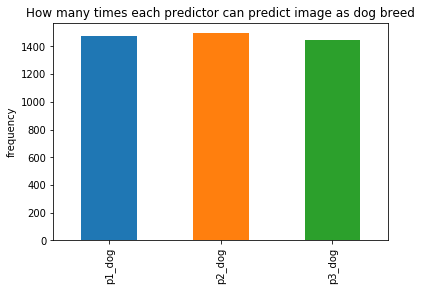

In [150]:
breed_predict.sum().plot(kind='bar');
plt.title('How many times each predictor can predict image as dog breed')
plt.ylabel('frequency')

The best three predictors can predict given image as dog breed with similar performance with small diferencies. 

### Visualizing mean true proporsion of dog breed prediction 

In [151]:
#calculationg true and false prediction proportion
true_prop = breed_predict.sum().mean()/breed_predict.shape[0]
false_prop = 1 - true_prop

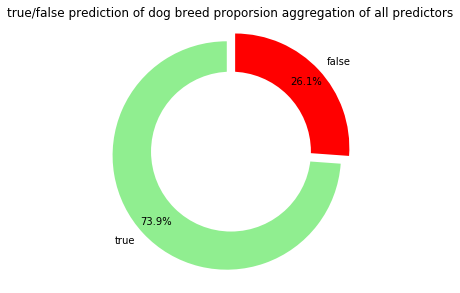

In [152]:
# Pie chart of proporsion
labels = ['true', 'false']
sizes = [true_prop, false_prop]
colors = ['#90EE90','#FF0000']
explode = (0.05,0.05)
fig1, ax1 = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('true/false prediction of dog breed proporsion aggregation of all predictors')
plt.show()

### Normalize tweet rating 

In [153]:
# ensure there are no 0 value in rating_denominator
twit_ac[twit_ac['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floof,pupper,puppo,normalize_rating,date,time,content,content_url_1,content_url_2


Seeing that dog rating has different scales, normalization becomes very important to compare each dog rating. Then, normalization can be calculated by formula = rating_numerator / rating_denominator.


In [154]:
twit_ac['normalize_rating'].describe()

count    2175.000000
mean        1.223433
std         4.246755
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: normalize_rating, dtype: float64

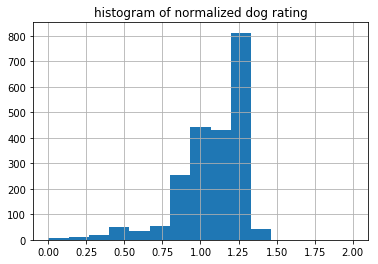

In [155]:
twit_ac['normalize_rating'].hist(range=(0,2), bins=15);
plt.title('histogram of normalized dog rating')
plt.show()

Normalized dog's rating data spreading is almost in normal distribution. There are some data outline that is proved by seeing describe data results. The max value of this parameter is 177.6 that is very far from mean data 1.22. Checking the data outline condition is needed to make data cleaner.

In [156]:
twit_ac['normalize_rating'].sort_values(ascending=False)

804     177.600000
163      66.600000
162      42.000000
1895     42.000000
246      18.200000
558       7.500000
429       3.428571
617       2.700000
1533      2.600000
52        1.700000
247       1.500000
38        1.400000
53        1.400000
529       1.400000
875       1.400000
310       1.400000
313       1.400000
753       1.400000
98        1.400000
357       1.400000
352       1.400000
159       1.400000
183       1.400000
61        1.400000
105       1.400000
180       1.400000
160       1.400000
161       1.400000
70        1.400000
507       1.400000
           ...    
2124      0.300000
1070      0.300000
618       0.300000
1011      0.300000
2060      0.300000
2023      0.300000
1957      0.300000
2004      0.300000
1422      0.300000
1513      0.300000
1900      0.200000
2067      0.200000
2168      0.200000
2129      0.200000
1741      0.200000
2058      0.200000
2145      0.200000
1419      0.200000
987       0.200000
1585      0.200000
1582      0.200000
2157      0.

In [157]:
twit_ac.iloc[804,:]

tweet_id                                                749981277374128128
in_reply_to_status_id                                                    0
in_reply_to_user_id                                                      0
source                   <a href="https://about.twitter.com/products/tw...
expanded_urls            https://twitter.com/dog_rates/status/749981277...
rating_numerator                                                      1776
rating_denominator                                                      10
name                                                               Atticus
doggo                                                                 None
floof                                                                 None
pupper                                                                None
puppo                                                                 None
normalize_rating                                                     177.6
date                     

rating numerator is very big, let see the tweet content to prve this value.

In [158]:
twit_ac.loc[804,'content']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

it is true that user has given that kind of score for the dog.Then to prove it in the unusual value, we need to print content on row 163, 162, 1895

In [159]:
rows_sel = [162, 163, 1895]

for i in rows_sel:
    print(twit_ac.content[i])

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
After so many requests... here you go.


All data is valid by seeing content.

### RT and favorite count correlation

In [160]:
rt_fav.head()

,tweet_id,retweet_count,favorite_count,favorite_retweet_ration
0,892420643555336193,7740,36366,4.698450
1,892177421306343426,5730,31326,5.467016
2,891815181378084864,3791,23598,6.224743
3,891689557279858688,7902,39669,5.020121
4,891327558926688256,8524,37867,4.442398


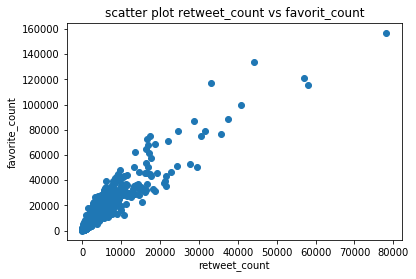

In [161]:
plt.scatter(rt_fav['retweet_count'], rt_fav['favorite_count']);
plt.title('scatter plot retweet_count vs favorit_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

it seems that retweet_count and favorite_count has positive corellation. This assumption is based on scatter plot above. It can be seen that the more big retweet_count the more value favorite_count is. The correlation between two variables can be calculated in calculation method below.

In [162]:
rt_fav[['retweet_count', 'favorite_count']].corr(method='pearson')

,retweet_count,favorite_count
retweet_count,1.000000,0.926974
favorite_count,0.926974,1.000000


Computed correlation between those variables is 0.927, which is proved that those variables has high enough positive correlation.